In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from statsmodels.tsa.ar_model import AutoReg,ar_select_order
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'time_series/Data/uspopulation.csv', index_col='DATE', parse_dates=True)
df.index.freq = 'MS'
df.index = df.index.sort_values()
df

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699
...,...
2018-08-01,327698
2018-09-01,327893
2018-10-01,328077


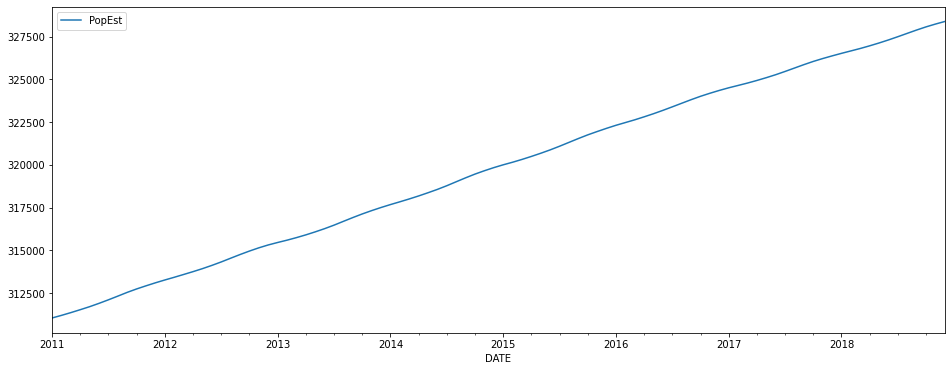

In [3]:
df.plot(figsize = (16,6));

In [4]:
len(df) #96-12=84, since forecasting for 1 year
train = df.iloc[:84]
test = df.iloc[84:]
model = AutoReg(train['PopEst'], lags=1)
AR1fit  = model.fit() #For order1 AR model

In [5]:
AR1fit.ar_lags

[1]

In [6]:
AR1fit.params

const        284.913797
PopEst.L1      0.999686
dtype: float64

In [7]:
start = len(train)
end = len(df) - 1
AR1fit.predict(start=start, end=end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [8]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [9]:
predictions1 = AR1fit.predict(start=start, end=end)
predictions1 = predictions1.rename('AR(1) Predictions')

<AxesSubplot:xlabel='DATE'>

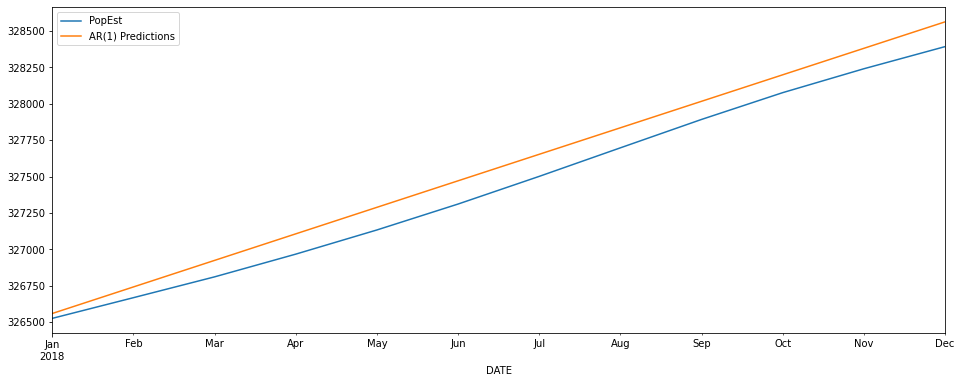

In [10]:
test.plot(figsize=(16,6), legend=True)
predictions1.plot(figsize=(16,6), legend=True)

In [11]:
AR2fit  = AutoReg(train['PopEst'], lags=2).fit() #For order2 AR model
predictions2 = AR2fit.predict(start=start, end=end)
predictions2 = predictions2.rename('AR(2) Predictions')
predictions2

2018-01-01    326535.672503
2018-02-01    326694.718510
2018-03-01    326854.882250
2018-04-01    327015.944948
2018-05-01    327177.719499
2018-06-01    327340.045896
2018-07-01    327502.787330
2018-08-01    327665.826846
2018-09-01    327829.064479
2018-10-01    327992.414808
2018-11-01    328155.804858
2018-12-01    328319.172306
Freq: MS, Name: AR(2) Predictions, dtype: float64

In [37]:
AR2fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                 PopEst   No. Observations:                   84
Model:                     AutoReg(2)   Log Likelihood                -320.605
Method:               Conditional MLE   S.D. of innovations             12.072
Date:                Sun, 05 Feb 2023   AIC                            649.209
Time:                        19:54:45   BIC                            658.836
Sample:                    03-01-2011   HQIC                           653.075
                         - 12-01-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        137.3683     96.729      1.420      0.156     -52.218     326.954
PopEst.L1      1.8535      0.056     33.016      0.000       1.743       1.964
PopEst.L2     -0.8538      0.056    -15.212      0.000      -0.964      -0.744
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0024           +0.0000j            1.0024            0.0000
AR.2            1.1684           +0.0000j            1.1684            0.0000
-----------------------------------------------------------------------------
"""

In [38]:
AR2fit.params

const        137.368305
PopEst.L1      1.853490
PopEst.L2     -0.853836
dtype: float64

<AxesSubplot:xlabel='DATE'>

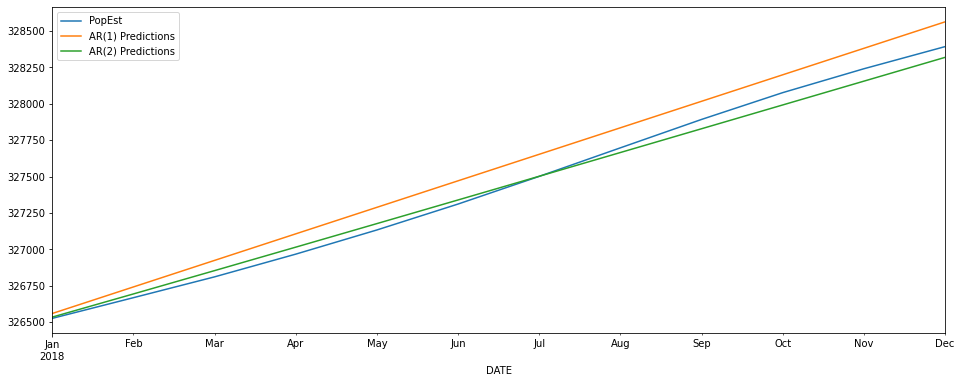

In [12]:
test.plot(figsize=(16,6), legend=True)
predictions1.plot(figsize=(16,6), legend=True)
predictions2.plot(figsize=(16,6), legend=True)

In [44]:
#To figure out the best order value, statsmodels can figure out itself ic(information criterion) 
# parameter to select the optimal lag length
order = ar_select_order(train['PopEst'],8)
ARfit = order.model.fit()
predictions8 = ARfit.predict(start,end)
predictions8 = predictions8.rename('AR(8) Preictions')
ARfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                 PopEst   No. Observations:                   84
Model:                     AutoReg(8)   Log Likelihood                -234.177
Method:               Conditional MLE   S.D. of innovations              5.272
Date:                Sun, 05 Feb 2023   AIC                            488.353
Time:                        19:59:32   BIC                            511.660
Sample:                    09-01-2011   HQIC                           497.668
                         - 12-01-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.3097     53.032      1.552      0.121     -21.632     186.251
PopEst.L1      2.4380      0.103     23.749      0.000       2.237       2.639
PopEst.L2     -2.3021      0.275     -8.384      0.000      -2.840      -1.764
PopEst.L3      1.5654      0.363      4.307      0.000       0.853       2.278
PopEst.L4     -1.4312      0.379     -3.772      0.000      -2.175      -0.687
PopEst.L5      1.1250      0.375      3.002      0.003       0.391       1.859
PopEst.L6     -0.9195      0.356     -2.583      0.010      -1.617      -0.222
PopEst.L7      0.9637      0.273      3.527      0.000       0.428       1.499
PopEst.L8     -0.4395      0.105     -4.185      0.000      -0.645      -0.234
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8650           -0.8343j            1.2018           -0.3779
AR.2           -0.8650           +0.8343j            1.2018            0.3779
AR.3            0.0275           -1.1704j            1.1708           -0.2463
AR.4            0.0275           +1.1704j            1.1708            0.2463
AR.5            0.8732           -0.5121j            1.0123           -0.0844
AR.6            0.8732           +0.5121j            1.0123            0.0844
AR.7            1.0012           -0.0000j            1.0012           -0.0000
AR.8            1.1202           -0.0000j            1.1202           -0.0000
-----------------------------------------------------------------------------
"""

In [48]:
predictions8

2018-01-01    326523.865561
2018-02-01    326662.772576
2018-03-01    326805.746885
2018-04-01    326960.064225
2018-05-01    327130.572938
2018-06-01    327315.962782
2018-07-01    327511.010095
2018-08-01    327710.938352
2018-09-01    327907.425530
2018-10-01    328092.870759
2018-11-01    328264.133654
2018-12-01    328421.667206
Freq: MS, Name: AR(8) Preictions, dtype: float64

In [46]:
from sklearn.metrics import mean_squared_error

labels = ['AR1','AR2','AR8']
preds = [predictions1, predictions2, predictions8]
for i in range(3):
    error = np.sqrt(mean_squared_error(test['PopEst'], preds[i]))
    print(f'{labels[i]} MSE was : {error}')

AR1 MSE was : 132.09736649865175
AR2 MSE was : 52.08894957479485
AR8 MSE was : 13.673777332246638


<AxesSubplot:xlabel='DATE'>

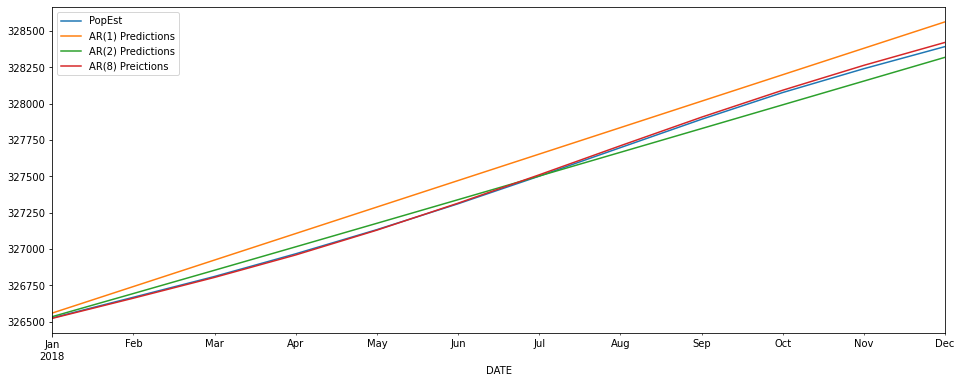

In [47]:
test.plot(figsize=(16,6), legend=True)
predictions1.plot(figsize=(16,6), legend=True)
predictions2.plot(figsize=(16,6), legend=True)
predictions8.plot(figsize=(16,6), legend=True)

In [50]:
#Forecasting on future data  for 2020
model = AutoReg(df['PopEst'],lags=8)
ARfit = model.fit()
forecasted_values = ARfit.predict(start=len(df),end=len(df)+12).rename('Forecast') #forecast months length equal to test data length
forecasted_values

2019-01-01    328537.134660
2019-02-01    328675.917700
2019-03-01    328818.863511
2019-04-01    328973.057155
2019-05-01    329142.516178
2019-06-01    329325.479852
2019-07-01    329516.233958
2019-08-01    329709.938550
2019-09-01    329899.389809
2019-10-01    330077.705073
2019-11-01    330242.359121
2019-12-01    330394.543823
2020-01-01    330538.846330
Freq: MS, Name: Forecast, dtype: float64

<AxesSubplot:xlabel='DATE'>

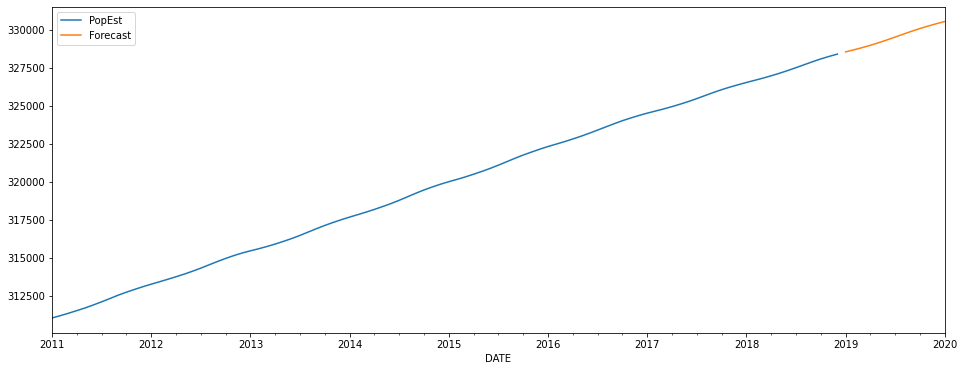

In [52]:
df['PopEst'].plot(figsize=(16,6), legend=True)
forecasted_values.plot(figsize=(16,6), legend=True)

## Statistical tests for time series

In [4]:
df1 = pd.read_csv('time_series/Data/airline_passengers.csv', index_col='Month', parse_dates=True)
df1.index.freq = 'MS'

df2 = pd.read_csv('time_series/Data/DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df2.index.freq = 'D'

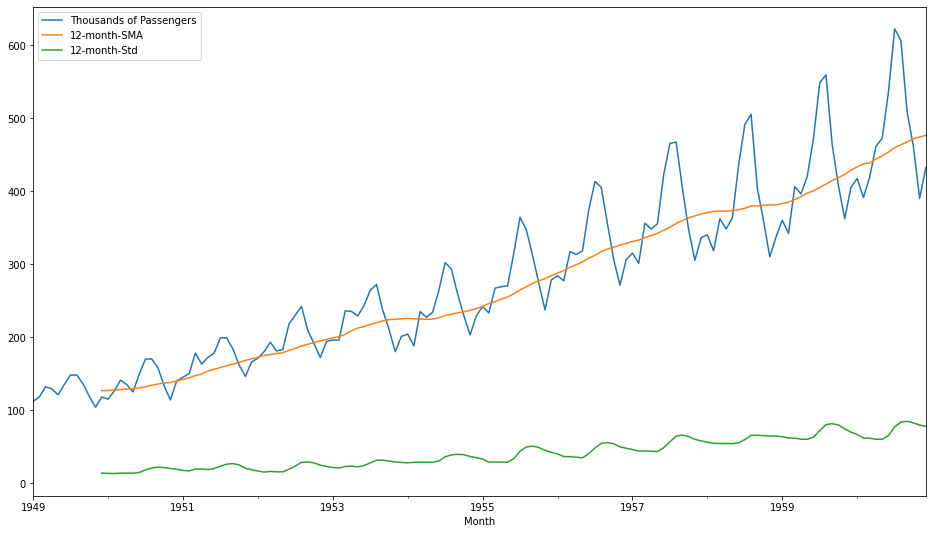

In [17]:
#non stationary with seasonality and upward trend
df1['12-month-SMA'] = df1['Thousands of Passengers'].rolling(window=12).mean()
df1['12-month-Std'] = df1['Thousands of Passengers'].rolling(window=12).std()

df1[['Thousands of Passengers','12-month-SMA','12-month-Std']].plot(figsize=(16,9));

In [16]:
#Quantative test to see stationarity(Dickey Fuller Test)
from statsmodels.tsa.stattools import adfuller
adfuller(df1['Thousands of Passengers'],autolag='AIC')
# It shows test stattistic, p_value, nof lags used,no of observations used for ADF regression,crtitical values for 
#test statistic at different levels etc.

(0.8153688792060482,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [15]:
dftest = adfuller(df1['Thousands of Passengers'])
dfout = pd.Series(dftest[0:4], index= ['ADF test statistic', 'p-value', '# Lags used', '# of observations'])
for key,val in dftest[4].items():
    dfout[f'critical value ({key})'] = val
dfout

ADF test statistic        0.815369
p-value                   0.991880
# Lags used              13.000000
# of observations       130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64

In [14]:
def adf_test(timeseries):
    adf_test_result = adfuller(timeseries)
    adf_test_statistics = {'Test Statistic': adf_test_result[0],
                           'p-value': adf_test_result[1],
                           'Lags Used': adf_test_result[2],
                           'Number of Observations Used': adf_test_result[3],
                           'Critical Value (1%)': adf_test_result[4]['1%'],
                           'Critical Value (5%)': adf_test_result[4]['5%'],
                           'Critical Value (10%)': adf_test_result[4]['10%']}
    return adf_test_statistics
adf_test(df1['Thousands of Passengers'])

{'Test Statistic': 0.8153688792060482,
 'p-value': 0.991880243437641,
 'Lags Used': 13,
 'Number of Observations Used': 130,
 'Critical Value (1%)': -3.4816817173418295,
 'Critical Value (5%)': -2.8840418343195267,
 'Critical Value (10%)': -2.578770059171598}

Here we have a very high p-value at 0.99, which provides weak evidence against the null hypothesis, and so we <em>fail to reject</em> the null hypothesis, and decide that our dataset is not stationary.<br>
Note: in statistics we don't "accept" a null hypothesis - nothing is ever truly proven - we just fail to reject it.

## Function for running dickey fuller test

In [19]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

adf_test(df1['Thousands of Passengers'],'for AIC')

Augmented Dickey-Fuller Test: for AIC
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [20]:
df2

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


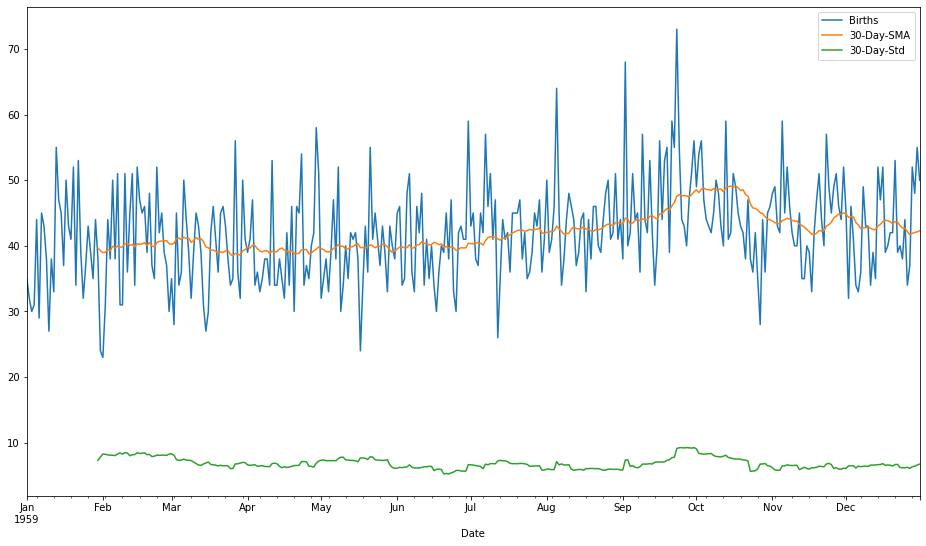

In [21]:
#non stationary with seasonality and upward trend
df2['30-Day-SMA'] = df2['Births'].rolling(window=30).mean()
df2['30-Day-Std'] = df2['Births'].rolling(window=30).std()

df2[['Births','30-Day-SMA','30-Day-Std']].plot(figsize=(16,9));

In [22]:
adf_test(df2['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


## Granger Casuality Tests
The <a href='https://en.wikipedia.org/wiki/Granger_causality'>Granger causality test</a> is a a hypothesis test to determine if one time series is useful in forecasting another. While it is fairly easy to measure correlations between series - when one goes up the other goes up, and vice versa - it's another thing to observe changes in one series correlated to changes in another after a consistent amount of time. This <em>may</em> indicate the presence of causality, that changes in the first series influenced the behavior of the second. However, it may also be that both series are affected by some third factor, just at different rates. Still, it can be useful if changes in one series can predict upcoming changes in another, whether there is causality or not. In this case we say that one series "Granger-causes" another.

In the case of two series, $y$ and $x$, the null hypothesis is that lagged values of $x$ do <em>not</em> explain variations in $y$.<br>
In other words, it assumes that $x_t$ doesn’t Granger-cause $y_t$.

The stattools <tt><strong>grangercausalitytests</strong></tt> function offers four tests for granger non-causality of 2 timeseries

For this example we'll use the samples.csv file, where columns 'a' and 'd' are stationary datasets.

In [28]:
df3 = pd.read_csv('time_series/Data/samples.csv', index_col=0, parse_dates=True)
df3.index.freq = 'MS'
df3

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62
...,...,...,...,...
1959-08-01,49,73,9338,58
1959-09-01,41,77,9502,38
1959-10-01,64,70,9667,42
1959-11-01,37,87,9833,62


<AxesSubplot:>

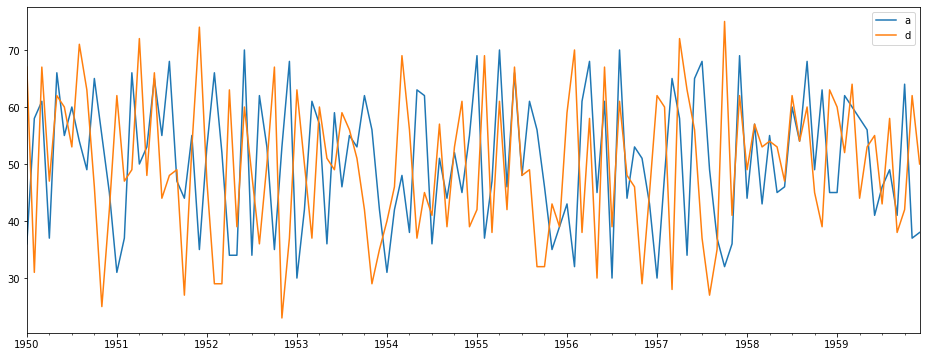

In [27]:
df3[['a','d']].plot(figsize=(16,6))

<AxesSubplot:>

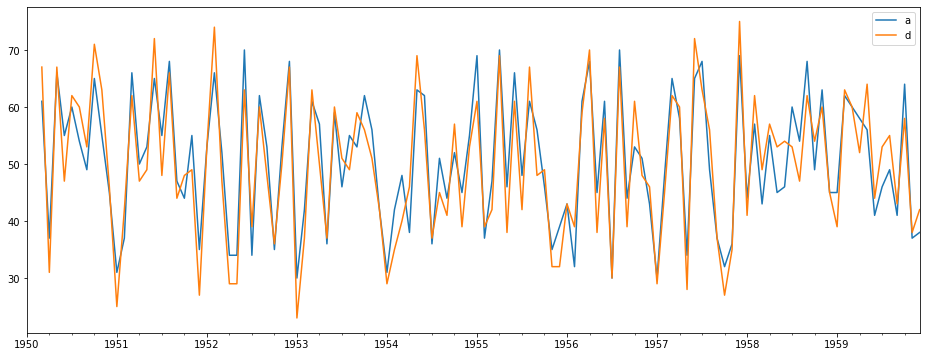

In [31]:
df3['a'].iloc[2:].plot(figsize=(16,6), legend=True)
df3['d'].shift(2).plot(legend=True) 
#It indicates d has casuality on a a time series

In [33]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df3[['a','d']], maxlag=3);
#smaller p values shows that we can reject the null hypothesis and there is casuality


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


In [34]:
grangercausalitytests(df3[['a','b']], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8657  , p=0.1746  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.9140  , p=0.1665  , df=1
likelihood ratio test: chi2=1.8988  , p=0.1682  , df=1
parameter F test:         F=1.8657  , p=0.1746  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9723  , p=0.1439  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=4.1192  , p=0.1275  , df=2
likelihood ratio test: chi2=4.0489  , p=0.1321  , df=2
parameter F test:         F=1.9723  , p=0.1439  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1777  , p=0.3216  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=3.7580  , p=0.2888  , df=3
likelihood ratio test: chi2=3.6989  , p=0.2959  , df=3
parameter F test:         F=1.1777  , p=0.3216  , df_denom=110, df_num=3


## Evaluating forecast accuracy
Two calculations related to linear regression are <a href='https://en.wikipedia.org/wiki/Mean_squared_error'><strong>mean squared error</strong></a> (MSE) and <a href='https://en.wikipedia.org/wiki/Root-mean-square_deviation'><strong>root mean squared error</strong></a> (RMSE)

The formula for the mean squared error is<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;$MSE = {\frac 1 L} \sum\limits_{l=1}^L (y_{T+l} - \hat y_{T+l})^2$<br><br>
where $T$ is the last observation period and $l$ is the lag point up to $L$ number of test observations.

The formula for the root mean squared error is<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;$RMSE = \sqrt{MSE} = \sqrt{{\frac 1 L} \sum\limits_{l=1}^L (y_{T+l} - \hat y_{T+l})^2}$<br><br>

The advantage of the RMSE is that it is expressed in the same units as the data.<br><br>

A method similar to the RMSE is the <a href='https://en.wikipedia.org/wiki/Mean_absolute_error'><strong>mean absolute error</strong></a> (MAE) which is the mean of the magnitudes of the error, given as<br><br>

&nbsp;&nbsp;&nbsp;&nbsp;$MAE = {\frac 1 L} \sum\limits_{l=1}^L \mid{y_{T+l}} - \hat y_{T+l}\mid$<br><br>

A forecast method that minimizes the MAE will lead to forecasts of the median, while minimizing the RMSE will lead to forecasts of the mean.

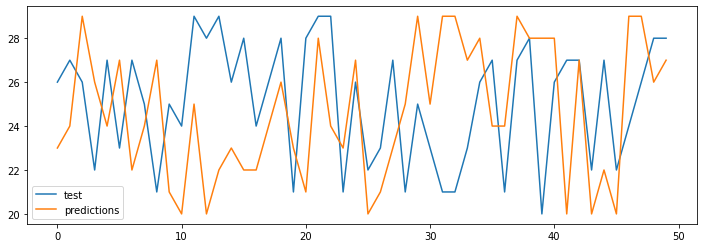

In [37]:
np.random.seed(42)
df = pd.DataFrame(np.random.randint(20,30,(50,2)),columns=['test','predictions'])
df.plot(figsize=(12,4));

In [38]:
from statsmodels.tools.eval_measures import mse,rmse,meanabs
MSE = mse(df['test'],df['predictions'])
RMSE = rmse(df['test'],df['predictions'])
MAE = meanabs(df['test'],df['predictions'])

print(f'Model  MSE: {MSE:.3f}')
print(f'Model RMSE: {RMSE:.3f}')
print(f'Model  MAE: {MAE:.3f}')

Model  MSE: 17.020
Model RMSE: 4.126
Model  MAE: 3.540


In [39]:
#to check at which month seasonality is happening, construct seasonality plots
df = pd.read_csv('time_series/Data/airline_passengers.csv', index_col='Month', parse_dates=True)
df.index.freq = 'MS'

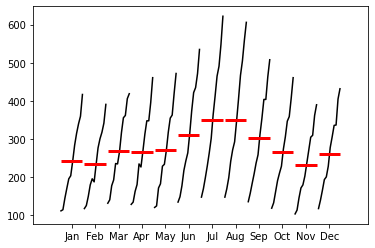

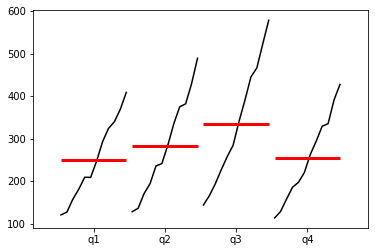

In [43]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

month_plot(df['Thousands of Passengers']);
dfq = df['Thousands of Passengers'].resample(rule='Q').mean()
quarter_plot(dfq);